## 1 直方图的概念
一般称为灰度直方图，因为为8位位图，值的范围0～255


1）普通直方图：统计个数

横坐标：图像中各个像素点的灰度级，如是8位图像，则横坐标为0,1，2,...,255

纵坐标：具有该灰度级的像素个数，如图像中像素值为100的一共有21个

如某个图像的像素值为a=[[1,1,3],[2,3,5],[5,1,4]],则x=[1,2,3,4,5],y=[3,1,2,1,2]

2）归一化直方图：统计概率

横坐标：图像中各个像素点的灰度级

纵坐标：出现这个灰度级的概率

参数：

1)DIMS：使用参数的数量，即绘制直方图时同时考虑几件事情

一般取dims=1，即仅仅考虑灰度级这一种情况，dims为别的整数也有，比如还要考虑亮度等等

2)BINS：参数子集的数目

对于一般的灰度图像，值的范围为：0～255，则bins=256，也可以将其分成16组：[0,255]=[0,15],[16,31],...,[240,255],bin=16

而对于a=[[1,1,3],[2,3,5],[5,1,4]],则x=[1,2,3,4,5],y=[3,1,2,1,2]，bins=5，也可以將其分成1～2、3～4、5～6三组，从而bins=3

3)RANGE:统计灰度值的范围，一般为[0,255],其中，最小值0为黑色，最大值255为白色

## 2 绘制直方图
利用python绘制直方图

matplotlib.pyplot

函数hist

语法： hist(数据源，像素级）  #根据数据源和像素级绘制直方图

数据源：图像，必须是一维数组，n*1,一般图像为二维数组，需要先转换为一维数组,如b=a.ravel(),可以將多维数组a转换为一维数组b

像素级：一般是256，指[0,255]

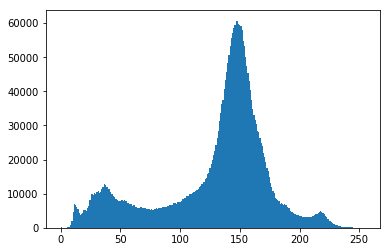

In [2]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/boat.jpg")
plt.hist(img.ravel(),256)
plt.show()

## 3 使用opencv统计直方图

函数calcHist,用来统计y轴的值

对于灰度图像：横坐标：[0,255],纵坐标：[N0,N1,N2,...,N254,N255]

格式：

hist=cv2.calcHist(images,channels,mask,histSize,ranges[,accumulate])

hist:直方图，是一个多行一列的数组，不是图像

images:原始图像，需要用中括号括起来

channels:指定通道，需要用中括号括起来，如果是灰度图像，为[0],如果为彩色图像，可以是[0],[1],[2],分别对应通道B、G、R。

mask：掩码图像，如果图像很大，可以只计算一部分，如果统计整幅图，设为None，如果只计算一部分时，需要掩码图像

histSize:BINS的数量，需要用中括号括起来，如[256]

ranges：像素值范围RANGE,一般为[0,255]

accumulate:可选参数，累计标识,如果有多个图像，將累计起来构成一个直方图

默认值为False，即不用设定

如果被设置为True，则直方图在开始分配时不会被清零，將统计多个图像的值


In [3]:
import cv2
img=cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/girl.bmp")
hist=cv2.calcHist([img],[0],None,[256],[0,255])
print(type(hist))
print(hist.size)
print(hist.shape)
print(hist)

<class 'numpy.ndarray'>
256
(256, 1)
[[3.140e+02]
 [1.340e+02]
 [1.750e+02]
 [2.160e+02]
 [3.480e+02]
 [5.200e+02]
 [8.810e+02]
 [1.423e+03]
 [2.459e+03]
 [2.995e+03]
 [5.307e+03]
 [3.602e+03]
 [3.301e+03]
 [2.956e+03]
 [2.855e+03]
 [2.928e+03]
 [2.992e+03]
 [2.922e+03]
 [3.041e+03]
 [2.754e+03]
 [2.580e+03]
 [2.333e+03]
 [2.236e+03]
 [2.102e+03]
 [1.877e+03]
 [1.766e+03]
 [1.708e+03]
 [1.616e+03]
 [1.575e+03]
 [1.464e+03]
 [1.400e+03]
 [1.358e+03]
 [1.252e+03]
 [1.169e+03]
 [1.099e+03]
 [1.105e+03]
 [1.084e+03]
 [9.580e+02]
 [9.860e+02]
 [9.480e+02]
 [8.790e+02]
 [8.890e+02]
 [8.510e+02]
 [8.770e+02]
 [8.390e+02]
 [8.120e+02]
 [8.040e+02]
 [7.940e+02]
 [8.210e+02]
 [7.620e+02]
 [7.970e+02]
 [8.140e+02]
 [8.030e+02]
 [7.960e+02]
 [7.170e+02]
 [7.690e+02]
 [8.030e+02]
 [7.930e+02]
 [8.000e+02]
 [7.430e+02]
 [7.630e+02]
 [8.390e+02]
 [7.770e+02]
 [7.230e+02]
 [7.360e+02]
 [7.870e+02]
 [8.220e+02]
 [7.990e+02]
 [8.490e+02]
 [8.600e+02]
 [8.140e+02]
 [8.640e+02]
 [8.710e+02]
 [8.850e+02]
 

## 4 绘制opencv统计直方图

使用matplotlib.pyplot绘制

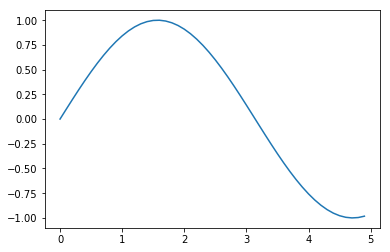

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x,y)

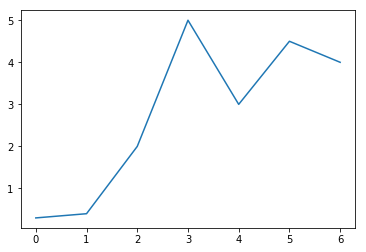

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = [0,1,2,3,4,5,6]
y = [0.3,0.4,2,5,3,4.5,4]
plt.plot(x,y)

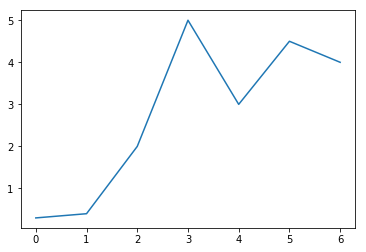

In [8]:
import numpy as np
import matplotlib.pyplot as plt
y = [0.3,0.4,2,5,3,4.5,4] #如果x轴为从0开始的整数，可以直接绘制
plt.plot(y)

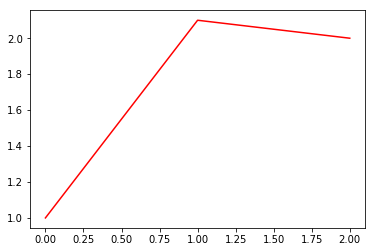

In [2]:
import numpy as np
import matplotlib.pyplot as plt
a = [1,2.1,2]
plt.plot(a,color='r')

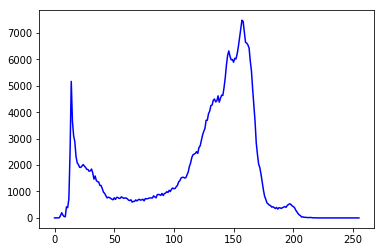

In [4]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/boatGray.bmp")
histb = cv2.calcHist([img],[0],None,[256],[0,255]) #灰色图像只有一个通道
plt.plot(histb,color="b")
plt.show()

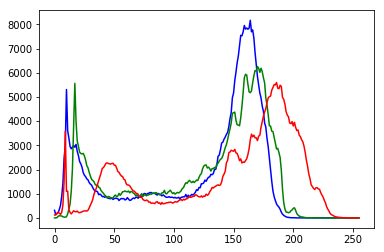

In [6]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/girl.bmp")
histb = cv2.calcHist([img],[0],None,[256],[0,255]) #b通道
histg = cv2.calcHist([img],[1],None,[256],[0,255]) #g通道
histr = cv2.calcHist([img],[2],None,[256],[0,255]) #r通道
plt.plot(histb,color='b')
plt.plot(histg,color='g')
plt.plot(histr,color='r')
plt.show()

## 5 使用掩膜的直方图
掩膜图像：只有白色和黑色：黑色部分不透明,值都为0，白色部分透明，值都为255，如果是二值图像，都为1,將掩膜图像放到原始图像上，只有白色部分能看到

生成掩膜图像： mask=np.zeros(image.shape,np.uint8)

mask[200:400,200:400]=255

在直方图中使用mask的值：

hist=cv2.calcHist(images,channels,mask,histSize,ranges)
images:原始图像

channels:指定通道

mask:掩码图像

histSize:BINS的数量

ranges:像素值范围RANGE

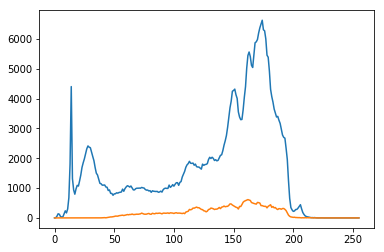

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/girl.bmp",cv2.IMREAD_GRAYSCALE)
mask = np.zeros(image.shape,np.uint8)
mask[200:400,200:400]=255
histMI = cv2.calcHist([image],[0],mask,[256],[0,255])
histImage = cv2.calcHist([image],[0],None,[256],[0,255])
plt.plot(histImage)
plt.plot(histMI)

## 6 掩膜处理 
掩膜原理：“与”的关系，掩膜图像白色透明区域当为灰度图像时，都为255，为二值图像时，都为1，黑色不透明区域都为0,原始图像和掩膜图像相与，与白色透明区域重合的部分为原来的值，与黑色部分重合的区域都为0

1）生成掩膜图像：

mask=np.zeros(800,np.uint8)

mask[300:500,300:500]=255

2)计算结果：

计算结果=cv2.bitwise_and(原始图像，掩膜图像）  #官方例子用cv2.bitwise_and(img,img,mask=mask)，太麻烦，没必要

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/boat.bmp",cv2.IMREAD_GRAYSCALE) 
mask = np.zeros(image.shape,np.uint8)
mask[200:400,200:400]=255
mi = cv2.bitwise_and(image,mask)
cv2.imshow("original",image)
cv2.imshow("mask",mask)
cv2.imshow("mi",mi)
cv2.waitKey()
cv2.destroyAllWindows()

## 7 直方图均衡化原理
直方图均衡化：將像素均匀分配到各个灰度级中

为什么需要进行直方图均衡化：如果一幅图像占有全部可能的灰度级，并且均匀分布，则该图像具有高对比度和多变的灰度色调，图像细节丰富，质量更高

实现的步骤：

1）计算累计直方图

2）將累计直方图进行区间转换

3）通过肉眼观察，在累计直方图中，將概率相近的原始值，手动处理为相同的值

应用场合：

1）医疗图像，如ct

2）车牌识别

3）人脸识别

如果得到的图像过黯或过亮，就需要均衡化处理

## 8 直方图均衡化函数

语法：

dst=cv2.equalizeHist(src)

src:源图像

dst：目标图像，处理结果

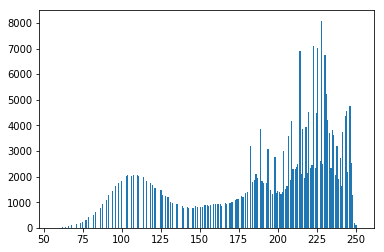

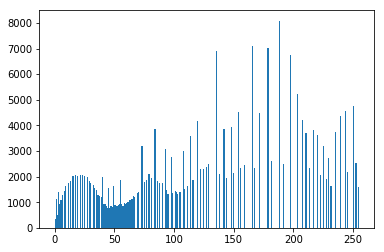

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/equ.bmp",cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.hist(img.ravel(),256)
plt.figure()  #需要新建另一个窗口绘制下一个图,否则会覆盖掉上一个图像
plt.hist(equ.ravel(),256)
plt.show()

In [18]:
cv2.imshow("original",img)
cv2.imshow("result",equ)
cv2.waitKey()
cv2.destroyAllWindows()

## 9 subplot函数的使用
函数subplot：將所有图像显示在一个窗口，分多行多列

语法：

subplot(nrows,ncols,plot_number)

如：subplot(2,3,4) #將窗口分成2行3列，当前绘制第四个串口，也就是在第2行第1列

特例：当每个参数都小于10时，可以直接书写三个数字，如subplot(234)

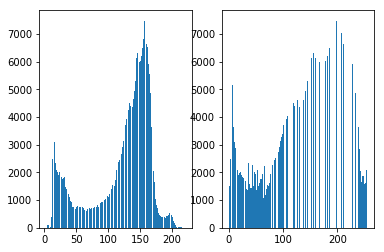

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/boatGray.bmp",cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.subplot(121)
plt.hist(img.ravel(),256)
plt.subplot(122)
plt.hist(equ.ravel(),256)
plt.show() #此行在jupyter中必须得加，不然画不出来

## 10 matplotlib.pyplot.imshow函数的使用

格式：

imshow(X[,cmap=None])

X:要绘制的图像

cmap：colormap，颜色图谱，可选参数，默认为RGB颜色空间

显示问题：

当为灰度图像时，不能使用默认值，因为默认时RGB颜色空间，需要使用参数:cmap=plt.cm.gray

当为彩色图像时，如果是python类的，可使用默认值，但是如果是从opencv中读入图像时，因其格式为BGR，需要先调整为RGB

(<matplotlib.image.AxesImage at 0x7ff239d9c2e8>, (-0.5, 719.5, 575.5, -0.5))

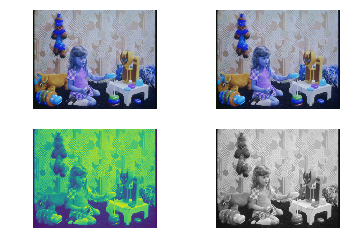

In [23]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/girl.bmp")
g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.imshow(img),plt.axis('off') #默认会有坐标轴信息，显示图像不需要 绘制彩色图像使用默认颜色，因为是从opencv出来的，会有问题
plt.subplot(222)
plt.imshow(img,cmap=plt.cm.gray),plt.axis('off') #彩色图像未经过变换为灰度图像，就直接指定颜色用灰度，会有问题
plt.subplot(223)
plt.imshow(g),plt.axis('off')  #先將彩色图像变换为灰度图像，直接使用默认颜色，因为默认为RGB格式，会有问题
plt.subplot(224)
plt.imshow(g,cmap=plt.cm.gray),plt.axis('off') #先將彩色图像转换为灰度图像，然后用参数cmap=plt.cm.gray,结果正确


(<matplotlib.image.AxesImage at 0x7ff239e7ba58>, (-0.5, 719.5, 575.5, -0.5))

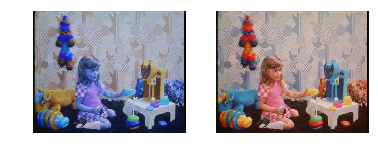

In [24]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/girl.bmp")
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b]) #从opencv中读入的图像需要重新组合，才能正确显示
plt.subplot(121)
plt.imshow(img),plt.axis('off')  #结果错误
plt.subplot(122)
plt.imshow(img2),plt.axis('off') #结果正确

## 11 直方图均衡化对比

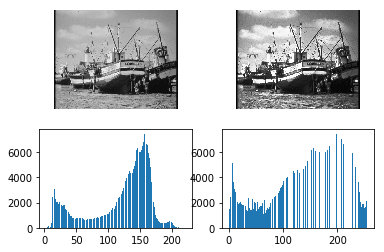

In [27]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/home/lyc/Desktop/python+opencv/chapter14/boat.bmp",cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.subplot(221)
plt.imshow(img,cmap=plt.cm.gray),plt.axis('off')
plt.subplot(222)
plt.imshow(equ,cmap=plt.cm.gray),plt.axis('off')
plt.subplot(223)
plt.hist(img.ravel(),256)
plt.subplot(224)
plt.hist(equ.ravel(),256)
plt.show() #jupyter中需要此行，不然不显示